In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [2]:
#conectar ao banco

conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="livro",
    database="clinica"
)

In [3]:
#consultar sql

query = """
SELECT 
    a.id_agendamento,
    p.nome,
    p.idade,
    p.sexo,
    a.especialidade,
    a.data_agendamento,
    a.hora_agendada,
    a.hora_atendimento,
    a.local,
    a.motivo_atraso
FROM agendamentos a
JOIN pacientes p ON a.paciente_id = p.paciente_id
"""

df = pd.read_sql(query,conn)
conn.close()

C:\Users\caioa\AppData\Local\Temp\ipykernel_12348\923432775.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [4]:
# Converter hora_agendada e hora_atendimento para datetime


if df['hora_agendada'].dtype == 'object':
    df['hora_agendada'] = pd.to_datetime(df['hora_agendada'], format='%H:%M:%S')

if df['hora_atendimento'].dtype == 'object':
    df['hora_atendimento'] = pd.to_datetime(df['hora_atendimento'], format='%H:%M:%S')


In [12]:
# Criar coluna de atraso em minutos

df['minutos_atraso'] = (
    (df['hora_atendimento'] - df['hora_agendada'])
    .dt.total_seconds()
    .div(60)
    .clip(lower=0)  # substitui negativos por 0
)



In [6]:
print(df.head())

   id_agendamento                    nome  idade       sexo especialidade  \
0            1201    João Guilherme Sousa     60  Masculino     Ortopedia   
1            1202          Alícia Sampaio     95   Feminino     Ortopedia   
2            1203        Alexandre Santos      2  Masculino   Cardiologia   
3            1204    Dr. Vinicius Pacheco     53  Masculino     Ortopedia   
4            1205  Gustavo Henrique Sales     40  Masculino     Ortopedia   

  data_agendamento   hora_agendada hora_atendimento                local  \
0       2025-04-20 0 days 11:22:50  0 days 12:22:50  Vila Santa Catarina   
1       2025-04-14 0 days 15:15:23  0 days 16:00:23              Morumbi   
2       2025-04-09 0 days 13:20:29  0 days 13:25:29         Vila Mariana   
3       2025-05-19 0 days 08:47:38  0 days 09:02:38  Vila Santa Catarina   
4       2025-03-19 0 days 11:36:11  0 days 11:36:11  Vila Santa Catarina   

         motivo_atraso  minutos_atraso  
0    Paciente atrasado            60.0 

In [7]:
# Agrupa os dados por especialidade e calcula a média de atraso
atraso_por_especialidade = df.groupby('especialidade')['minutos_atraso'].mean().sort_values(ascending=False)

C:\Users\caioa\AppData\Local\Temp\ipykernel_12348\1153315478.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atraso_por_especialidade.values, y=atraso_por_especialidade.index, palette="crest")


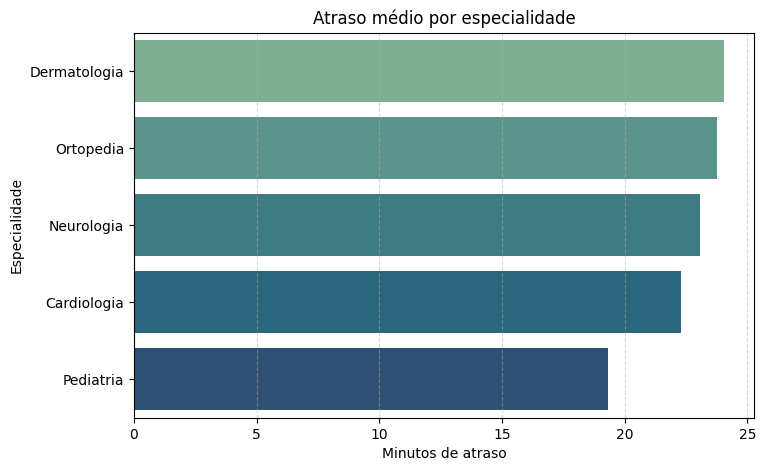

In [15]:
#grafico de barras


# Atraso médio por especialidade
atraso_por_especialidade = df.groupby('especialidade')['minutos_atraso'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=atraso_por_especialidade.values, y=atraso_por_especialidade.index, palette="crest")
plt.title('Atraso médio por especialidade')
plt.xlabel('Minutos de atraso')
plt.ylabel('Especialidade')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


C:\Users\caioa\AppData\Local\Temp\ipykernel_12348\3949025978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atraso_por_local.values, y=atraso_por_local.index, palette='magma')


<function matplotlib.pyplot.show(close=None, block=None)>

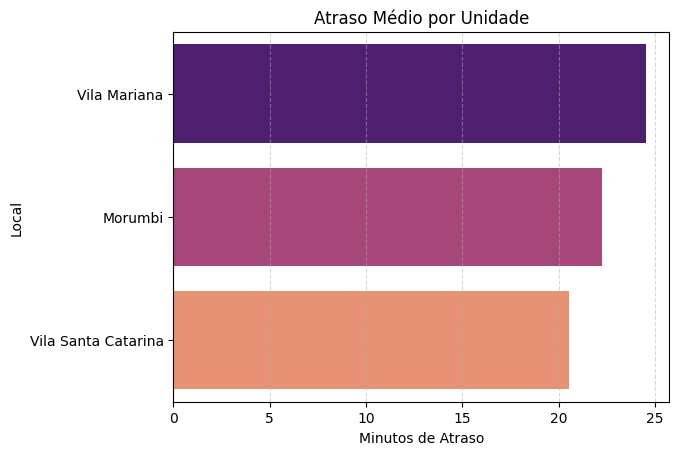

In [13]:
atraso_por_local = df.groupby('local')['minutos_atraso'].mean().sort_values(ascending=False)

plt.Figure(figsize=(8,5))
sns.barplot(x=atraso_por_local.values, y=atraso_por_local.index, palette='magma')
plt.title('Atraso Médio por Unidade')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Local')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show

C:\Users\caioa\AppData\Local\Temp\ipykernel_12348\2616341776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sexo',y='minutos_atraso', data=df, palette='Set2')


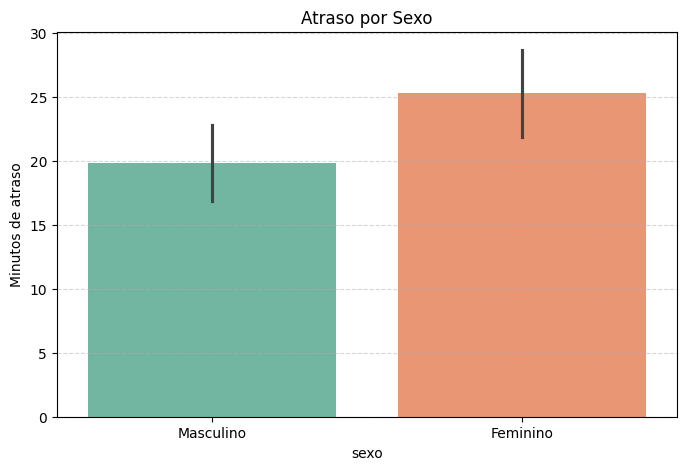

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='sexo',y='minutos_atraso', data=df, palette='Set2')
plt.title('Atraso por Sexo')
plt.ylabel('Minutos de atraso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\caioa\AppData\Local\Temp\ipykernel_12348\4043999679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=motivos_contagem.values, y=motivos_contagem.index, palette="cubehelix")


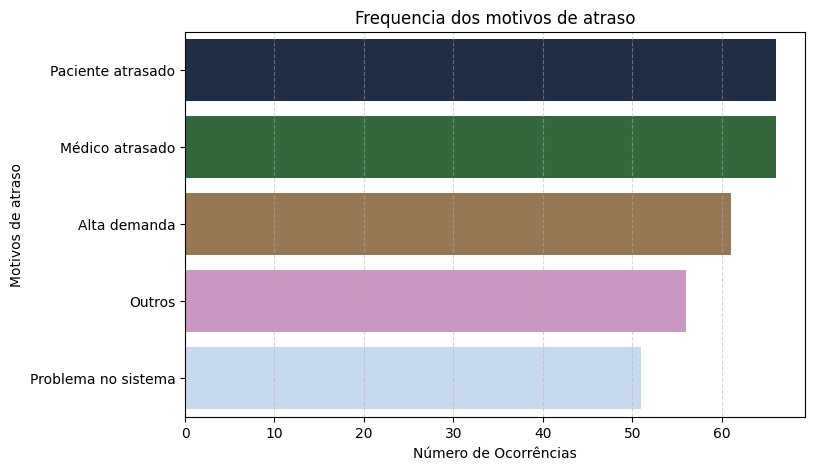

In [17]:
motivos_contagem = df['motivo_atraso'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=motivos_contagem.values, y=motivos_contagem.index, palette="cubehelix")
plt.title('Frequencia dos motivos de atraso')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Motivos de atraso')
plt.grid(axis='x', linestyle='--',alpha=0.5)
plt.show()